In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plt.rc('font', family='NanumBarunGothic') 
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use(['ggplot'])

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
custom = pd.read_csv('../data/cs_data.csv', low_memory = False)

In [3]:
custom.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

## 데이터 전처리

In [4]:
# M1_1, M1_2, M1_3로 되어 있는 데이터를 합계로 합침
# 결측치 처리
columns = ['BUY_CNT_M','SEL_CNT_M','BUY_ITM_CNT_M','SEL_ITM_CNT_M','BUY_AMT_M','SEL_AMT_M',
          'STK_IN_M','STK_OUT_M','MNY_IN_M','MNY_OUT_M','CONN_DYS_M','MTS_DYS_M','HTS_DYS_M']

for col in columns:
    # 결측치 -> 0
    to_fill = custom.loc[:,custom.columns.str.startswith(col)].columns
    print(to_fill)
    for fill in to_fill:
        custom[fill] = custom[fill].fillna(0)

    for i in range(1,5):
        # 합계 열 생성
        print(col + str(i) + "지우기 전 column 수 : ", custom.shape[1])        
        sum_column = custom.loc[:, custom.columns.str.startswith(col + str(i))].sum(axis=1) # 함계 계산
        custom = custom.drop(columns=custom.columns[custom.columns.str.startswith(col + str(i))]) # 기존 열 삭제
        custom[col + str(i) + '_sum'] = sum_column # 열 추가
        print(col + str(i) + "지운 후 column 수 : ", custom.shape[1])

Index(['BUY_CNT_M1_1', 'BUY_CNT_M1_2', 'BUY_CNT_M1_3', 'BUY_CNT_M2_1',
       'BUY_CNT_M2_2', 'BUY_CNT_M2_3', 'BUY_CNT_M3_1', 'BUY_CNT_M3_2',
       'BUY_CNT_M3_3', 'BUY_CNT_M4_1', 'BUY_CNT_M4_2', 'BUY_CNT_M4_3'],
      dtype='object')
BUY_CNT_M1지우기 전 column 수 :  520
BUY_CNT_M1지운 후 column 수 :  518
BUY_CNT_M2지우기 전 column 수 :  518
BUY_CNT_M2지운 후 column 수 :  516
BUY_CNT_M3지우기 전 column 수 :  516
BUY_CNT_M3지운 후 column 수 :  514
BUY_CNT_M4지우기 전 column 수 :  514
BUY_CNT_M4지운 후 column 수 :  512
Index(['SEL_CNT_M1_1', 'SEL_CNT_M1_2', 'SEL_CNT_M1_3', 'SEL_CNT_M2_1',
       'SEL_CNT_M2_2', 'SEL_CNT_M2_3', 'SEL_CNT_M3_1', 'SEL_CNT_M3_2',
       'SEL_CNT_M3_3', 'SEL_CNT_M4_1', 'SEL_CNT_M4_2', 'SEL_CNT_M4_3'],
      dtype='object')
SEL_CNT_M1지우기 전 column 수 :  512
SEL_CNT_M1지운 후 column 수 :  510
SEL_CNT_M2지우기 전 column 수 :  510
SEL_CNT_M2지운 후 column 수 :  508
SEL_CNT_M3지우기 전 column 수 :  508
SEL_CNT_M3지운 후 column 수 :  506
SEL_CNT_M4지우기 전 column 수 :  506
SEL_CNT_M4지운 후 column 수 :  504
Index(['BUY_ITM_CNT_M1_1

In [5]:
custom.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

In [6]:
for col in columns:
    # 결측치 -> 0
    to_fill = custom.loc[:,custom.columns.str.startswith(col)].columns
    print(to_fill)
    for fill in to_fill:
        custom[fill] = custom[fill].fillna(0)

Index(['BUY_CNT_M1_sum', 'BUY_CNT_M2_sum', 'BUY_CNT_M3_sum', 'BUY_CNT_M4_sum'], dtype='object')
Index(['SEL_CNT_M1_sum', 'SEL_CNT_M2_sum', 'SEL_CNT_M3_sum', 'SEL_CNT_M4_sum'], dtype='object')
Index(['BUY_ITM_CNT_M1_sum', 'BUY_ITM_CNT_M2_sum', 'BUY_ITM_CNT_M3_sum',
       'BUY_ITM_CNT_M4_sum'],
      dtype='object')
Index(['SEL_ITM_CNT_M1_sum', 'SEL_ITM_CNT_M2_sum', 'SEL_ITM_CNT_M3_sum',
       'SEL_ITM_CNT_M4_sum'],
      dtype='object')
Index(['BUY_AMT_M1_sum', 'BUY_AMT_M2_sum', 'BUY_AMT_M3_sum', 'BUY_AMT_M4_sum'], dtype='object')
Index(['SEL_AMT_M1_sum', 'SEL_AMT_M2_sum', 'SEL_AMT_M3_sum', 'SEL_AMT_M4_sum'], dtype='object')
Index(['STK_IN_M1_sum', 'STK_IN_M2_sum', 'STK_IN_M3_sum', 'STK_IN_M4_sum'], dtype='object')
Index(['STK_OUT_M1_sum', 'STK_OUT_M2_sum', 'STK_OUT_M3_sum', 'STK_OUT_M4_sum'], dtype='object')
Index(['MNY_IN_M1_sum', 'MNY_IN_M2_sum', 'MNY_IN_M3_sum', 'MNY_IN_M4_sum'], dtype='object')
Index(['MNY_OUT_M1_sum', 'MNY_OUT_M2_sum', 'MNY_OUT_M3_sum', 'MNY_OUT_M4_sum'], dtype=

In [7]:
# 현금성 자산액, 국내주식 평가액, 해외주식 평가액
columns = ['CASH_AST_M','DMST_AST_EVAL_M','OVST_AST_EVAL_M','DMST_AST_PCHS_M','OVST_AST_PCHS_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [8]:
# 국내주식 평가액 1,2,3
columns = ['DMST_AST1_EVAL_M','DMST_AST2_EVAL_M','DMST_AST3_EVAL_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [9]:
# 국내주식 매입액 1,2,3
columns = ['DMST_AST1_PCHS_M','DMST_AST2_PCHS_M','DMST_AST3_PCHS_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [10]:
# 해외주식 평가액 1,2,3
columns = ['OVST_AST1_EVAL_M','OVST_AST2_EVAL_M','OVST_AST3_EVAL_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [11]:
# 해외주식 매입액 1,2,3
columns = ['OVST_AST1_PCHS_M','OVST_AST2_PCHS_M','OVST_AST3_PCHS_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [12]:
# 주식 매수액 1,2,3
for i in range(1,4):
    for j in range(1,5):
        for k in range(1,4):
            columns_tofill_na = 'BUY' + str(i) + '_AMT_M' + str(j) + '_' + str(k)
            custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [13]:
# 주식 매도액 1,2,3
for i in range(1,4):
    for j in range(1,5):
        for k in range(1,4):
            columns_tofill_na = 'SEL' + str(i) + '_AMT_M' + str(j) + '_' + str(k)
            custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [14]:
# 매도액 중 기간별 비중
columns = ['DAY_TR_RATIO','SWING_TR_RATIO','MONTHS_TR_RATIO','MID_TR_RATIO','HLD_TR_RATIO','YEARS_TR_RATIO']

# for col in columns:
#     custom[col] = custom[col].fillna(0)

## 변수 생성

In [15]:
# 보유 금액
# 현금성 자산액 + 국내주식 평가액 + 해외주식 평가액
for i in range(1,5):
    custom['ASSET_M' + str(i)] = custom['CASH_AST_M' + str(i)] + custom['DMST_AST_EVAL_M' + str(i)] + custom['OVST_AST_EVAL_M' + str(i)]

custom['ASSET_sum'] = custom['ASSET_M1'] + custom['ASSET_M2'] + custom['ASSET_M3'] + custom['ASSET_M4']

In [16]:
# 국내주식 1,2,3위 평가액 합
for i in range(1,5):
    custom['DMST_AST_EVAL_SUM_M' + str(i)] = custom['DMST_AST1_EVAL_M' + str(i)] + custom['DMST_AST2_EVAL_M' + str(i)] + custom['DMST_AST3_EVAL_M' + str(i)]

# 국내주식 1,2,3위 매입액 합
for i in range(1,5):
    custom['DMST_AST_PCHS_SUM_M' + str(i)] = custom['DMST_AST1_PCHS_M' + str(i)] + custom['DMST_AST2_PCHS_M' + str(i)] + custom['DMST_AST3_PCHS_M' + str(i)]
    
custom['DMST_AST_EVAL_sum'] = custom['DMST_AST_EVAL_SUM_M1'] + custom['DMST_AST_EVAL_SUM_M2'] + custom['DMST_AST_EVAL_SUM_M3'] + custom['DMST_AST_EVAL_SUM_M4']
custom['DMST_AST_PCHS_sum'] = custom['DMST_AST_PCHS_SUM_M1'] + custom['DMST_AST_PCHS_SUM_M2'] + custom['DMST_AST_PCHS_SUM_M3'] + custom['DMST_AST_PCHS_SUM_M4']

In [17]:
# 해외주식 1,2,3위 평가액 합
for i in range(1,5):
    custom['OVST_AST_EVAL_SUM_M' + str(i)] = custom['OVST_AST1_EVAL_M' + str(i)] + custom['OVST_AST2_EVAL_M' + str(i)] + custom['OVST_AST3_EVAL_M' + str(i)]
    
# 해외주식 1,2,3위 매입액 합
for i in range(1,5):
    custom['OVST_AST_PCHS_SUM_M' + str(i)] = custom['OVST_AST1_PCHS_M' + str(i)] + custom['OVST_AST2_PCHS_M' + str(i)] + custom['OVST_AST3_PCHS_M' + str(i)]
    
custom['OVST_AST_EVAL_sum'] = custom['OVST_AST_EVAL_SUM_M1'] + custom['OVST_AST_EVAL_SUM_M2'] + custom['OVST_AST_EVAL_SUM_M3'] + custom['OVST_AST_EVAL_SUM_M4']
custom['OVST_AST_PCHS_sum'] = custom['OVST_AST_PCHS_SUM_M1'] + custom['OVST_AST_PCHS_SUM_M2'] + custom['OVST_AST_PCHS_SUM_M3'] + custom['OVST_AST_PCHS_SUM_M4']

In [18]:
# 거래횟수(매수 + 매도 횟수)
for i in range(1,5):
    custom['TRANSACTION_CNT'] = (
    custom['BUY_CNT_M1_sum'] + custom['BUY_CNT_M2_sum'] + custom['BUY_CNT_M3_sum'] + custom['BUY_CNT_M4_sum'] + 
    custom['SEL_CNT_M1_sum'] + custom['SEL_CNT_M2_sum'] + custom['SEL_CNT_M3_sum'] + custom['SEL_CNT_M4_sum']
    )

In [19]:
# 거래횟수 로그 변환
custom['TRANSACTION_CNT_log'] = np.log(custom['TRANSACTION_CNT'] + 0.1)
# np.log(custom['TRANSACTION_CNT'] + 0.1).plot.hist() # 시각화

In [20]:
# 4달 평균 거래 종목 수
custom['BUY_ITM_CNT_avg'] = (custom['BUY_ITM_CNT_M1_sum'] + custom['BUY_ITM_CNT_M2_sum'] + custom['BUY_ITM_CNT_M3_sum'] + custom['BUY_ITM_CNT_M4_sum']) / 4

In [21]:
# 매수액 합계
custom['BUY_AMT_sum'] = custom['BUY_AMT_M1_sum'] + custom['BUY_AMT_M2_sum'] + custom['BUY_AMT_M3_sum'] + custom['BUY_AMT_M4_sum']

In [22]:
# 매도액 합계
custom['SELL_AMT_sum'] = custom['SEL_AMT_M1_sum'] + custom['SEL_AMT_M2_sum'] + custom['SEL_AMT_M3_sum'] + custom['SEL_AMT_M4_sum']

In [23]:
# 거래액 합계
custom['TRANSACTION_AMT_sum'] = custom['BUY_AMT_sum'] + custom['SELL_AMT_sum']

In [24]:
# 접속일수 합계
custom['CONN_DYS_sum'] = custom['CONN_DYS_M1_sum'] + custom['CONN_DYS_M2_sum'] + custom['CONN_DYS_M3_sum'] + custom['CONN_DYS_M4_sum']

In [25]:
# HTS 접속일수 합계
custom['HTS_DYS_sum'] = custom['HTS_DYS_M1_sum'] + custom['HTS_DYS_M2_sum'] + custom['HTS_DYS_M3_sum'] + custom['HTS_DYS_M4_sum']

In [26]:
# HTS 접속비중
custom['HTS_DYS_ratio'] = custom['HTS_DYS_sum'] / custom['CONN_DYS_sum']

In [27]:
# 주거래 매체
# HTS 접속비중이 0.8이상인 경우 주거래매체를 HTS로 판단(비중이 0.8 이상인 고객 비중은 6%)
custom['PLATFORM_HTS'] = custom['HTS_DYS_ratio'].apply(lambda x : 1 if x >= 0.8 else 0)

In [28]:
# 국내 주식수익 계산(평가액 - 매입액)
for i in range(1,5):
    custom['DMST_PCHS_EVAL_M' + str(i)] = custom['DMST_AST_EVAL_M' + str(i)] - custom['DMST_AST_PCHS_M' + str(i)]

custom['DMST_PCHS_EVAL_sum'] = custom['DMST_PCHS_EVAL_M1'] + custom['DMST_PCHS_EVAL_M2'] + custom['DMST_PCHS_EVAL_M3'] + custom['DMST_PCHS_EVAL_M4']

In [29]:
# 해외 주식수익 계산(평가액 - 매입액)
for i in range(1,5):
    custom['OVST_PCHS_EVAL_M' + str(i)] = custom['OVST_AST_EVAL_M' + str(i)] - custom['OVST_AST_PCHS_M' + str(i)]

custom['OVST_PCHS_EVAL_sum'] = custom['OVST_PCHS_EVAL_M1'] + custom['OVST_PCHS_EVAL_M2'] + custom['OVST_PCHS_EVAL_M3'] + custom['OVST_PCHS_EVAL_M4']

In [30]:
# 주식 수익 합(국내 + 해외)
custom['PCHS_EVAL_sum'] = custom['DMST_PCHS_EVAL_sum'] + custom['OVST_PCHS_EVAL_sum']

In [31]:
# 해외 주식거래액 합
custom['OVST_AST_EVAL_M_sum'] = custom['OVST_AST_EVAL_M1'] + custom['OVST_AST_EVAL_M2'] + custom['OVST_AST_EVAL_M3'] + custom['OVST_AST_EVAL_M4']
# 국내 주식거래액 합
custom['DMST_AST_EVAL_M_sum'] = custom['DMST_AST_EVAL_M1'] + custom['DMST_AST_EVAL_M2'] + custom['DMST_AST_EVAL_M3'] + custom['DMST_AST_EVAL_M4']
# 해외 거래 비중
custom['OVST_AST_ratio'] = custom['OVST_AST_EVAL_M_sum'] / (custom['OVST_AST_EVAL_M_sum'] + custom['DMST_AST_EVAL_M_sum'])

## 등급 생성

In [62]:
# 5개
# 자본수준(월 말일 기준 현금성 자산액 or 과거 최고자산액) O
# 분산/집중(상위1,2,3 / 거래액) O
# 주식관심도(접속일수, 거래빈도, 관리사원 존재여부, 공모주 참여 갯수) O
# 이익률(자산 매입액 - 자산평가액)
# 장기/단기(매도액 비중)
# 해외/국내

### 1. 자본수준(4달 평균 자산)

In [32]:
# 등급이 높을수록 자본수준 높음
# 4달 평균 보유 자산 합 
def degree(x):
    if x >= 0.8:
        return 1
    elif x >= 0.6:
        return 2
    elif x >= 0.4:
        return 3
    elif x >= 0.2:
        return 4
    else:
        return 5
    
custom['CAPITAL_avg'] = ((custom['CASH_AST_M1'] + custom['CASH_AST_M2'] + custom['CASH_AST_M3'] + custom['CASH_AST_M4']) +
            (custom['DMST_AST_EVAL_M1'] + custom['DMST_AST_EVAL_M2'] + custom['DMST_AST_EVAL_M3'] + custom['DMST_AST_EVAL_M4']) + 
            (custom['OVST_AST_EVAL_M1'] + custom['OVST_AST_EVAL_M2'] + custom['OVST_AST_EVAL_M3'] + custom['OVST_AST_EVAL_M4']))/4

custom['CAPITAL_percentile'] = custom['CAPITAL_avg'].rank(pct=True)
custom['CAPITAL_degree'] = custom['CAPITAL_percentile'].apply(degree) # 등급 매기기

### 2. 주식관심도

In [33]:
# 거래체결횟수, 거래액, 접속일수(MTS, HTS)
# 등급이 높을수록 관심도가 높음
# 가중평균 거래횟수 0.3, 거래금액 0.3, 접속일수 주거래가 HTS일 경우 0.4, MTS일 경우 0.3

custom['STOCK_INTEREST'] = (custom['TRANSACTION_CNT'].rank(pct=True) * 0.3 + 
                            custom['TRANSACTION_AMT_sum'].rank(pct=True) * 0.3 + 
                            custom['CONN_DYS_sum'].rank(pct = True) * custom['PLATFORM_HTS'].apply(lambda x : 0.4 if x == 1 else 0.3))

custom['STOCK_INTEREST_percentile'] = custom['STOCK_INTEREST'].rank(pct=True)
custom['STOCK_INTEREST_degree'] = custom['STOCK_INTEREST_percentile'].apply(degree) # 등급 매기기

0    751788
1     51520
Name: PLATFORM_HTS, dtype: int64


<Axes: xlabel='PLATFORM_HTS', ylabel='count'>

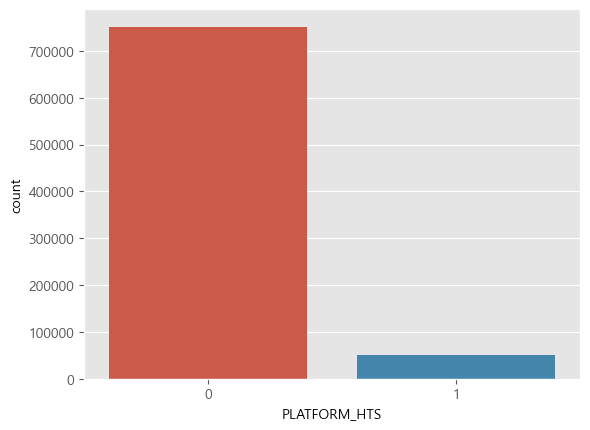

In [34]:
# 주거래 매체 비율
print(custom['PLATFORM_HTS'].value_counts())
sns.countplot(x = 'PLATFORM_HTS', data = custom)

<Axes: ylabel='Frequency'>

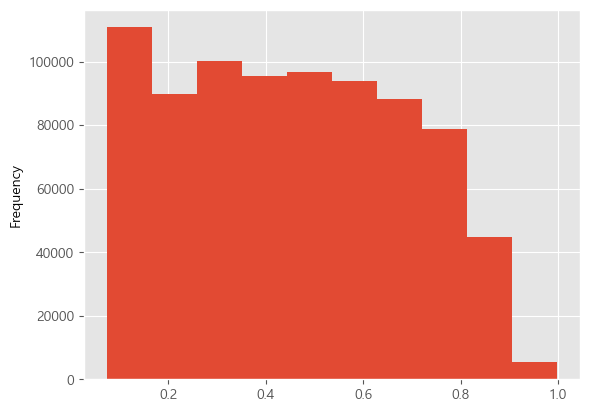

In [35]:
# 주식 관심도 분포
custom['STOCK_INTEREST'].plot.hist()

### 3. 투자 분산도(집중투자 or 분산투자)

In [36]:
# 1,2,3위 매수액 / 전체 매수액
# 등급이 높을수록 집중투자
custom['DISPERTION'] = (
        (custom['DMST_AST_PCHS_SUM_M1'] + custom['DMST_AST_PCHS_SUM_M2'] + custom['DMST_AST_PCHS_SUM_M3'] + custom['DMST_AST_PCHS_SUM_M4'] + 
        custom['OVST_AST_PCHS_SUM_M1'] + custom['OVST_AST_PCHS_SUM_M2'] + custom['OVST_AST_PCHS_SUM_M3'] + custom['OVST_AST_PCHS_SUM_M4']) /
        (custom['DMST_AST_PCHS_M1'] + custom['DMST_AST_PCHS_M2'] + custom['DMST_AST_PCHS_M3'] + custom['DMST_AST_PCHS_M4'] + 
        custom['OVST_AST_PCHS_M1'] + custom['OVST_AST_PCHS_M2'] + custom['OVST_AST_PCHS_M3'] + custom['OVST_AST_PCHS_M4']))

# 집중도가 1보다 큰 값이 있어서 1 이상의 값을 1로 변환
custom.loc[custom['DISPERTION'] > 1, 'DISPERTION'] = 1
custom['DISPERTION_percentile'] = custom['DISPERTION'].rank(pct=True)
custom['DISPERTION_degree'] = custom['DISPERTION_percentile'].apply(degree) # 등급 매기기

### 4. 주식 투자 기간

In [37]:
def timeline(x):
    if x >= 0.8:
        return 1
    elif x >= 0.6:
        return 2
    elif x >= 0.4:
        return 3
    elif x >= 0.2:
        return 4
    elif x >= 0:
        return 5
    else:
        return 6

In [38]:
# 0.6, 0.3, 0.1 순으로 가중치
# 높은 등급일수록 장기투자, 결측치는 6으로 처리

custom['TIMELINE'] = (custom['DAY_TR_RATIO'] * -0.6 + custom['SWING_TR_RATIO'] * -0.3 + custom['MONTHS_TR_RATIO'] * -0.1 + 
 custom['MID_TR_RATIO'] + 0.1 + custom['HLD_TR_RATIO'] * 0.3 + custom['YEARS_TR_RATIO'] * 0.6)

custom['TIMELINE_percentile'] = custom['TIMELINE'].rank(pct=True)
custom['TIMELINE_degree'] = custom['TIMELINE_percentile'].apply(timeline) # 등급 매기기

<Axes: ylabel='Frequency'>

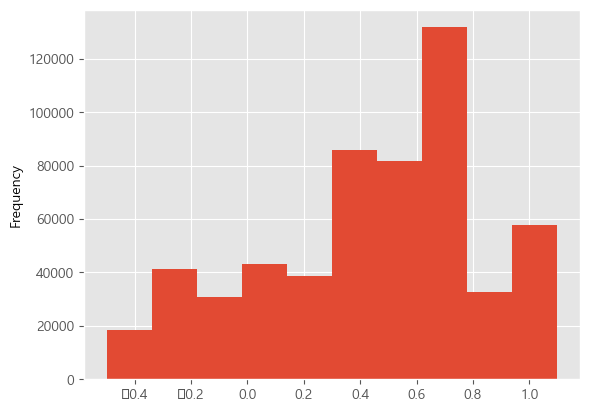

In [39]:
custom['TIMELINE'].plot.hist()

### 5. 해외/국내 주식 비율

In [40]:
custom['DMST_OVST_Ratio'] =  (
    (custom['DMST_AST_EVAL_M1'] + custom['DMST_AST_EVAL_M2'] + custom['DMST_AST_EVAL_M3'] + custom['DMST_AST_EVAL_M4']) /
    (custom['DMST_AST_EVAL_M1'] + custom['DMST_AST_EVAL_M2'] + custom['DMST_AST_EVAL_M3'] + custom['DMST_AST_EVAL_M4'] + 
     custom['OVST_AST_EVAL_M1'] + custom['OVST_AST_EVAL_M2'] + custom['OVST_AST_EVAL_M3'] + custom['OVST_AST_EVAL_M4'] + 0.001))

custom['DMST_OVST_percentile'] = custom['DMST_OVST_Ratio'].rank(pct=True)
custom['DMST_OVST_degree'] = custom['DMST_OVST_percentile'].apply(degree) # 등급 매기기

### 수익률

In [41]:
# 수익액/거래금액
# 거래가 없으면 분모가 0이 되므로 작은 값을 더함
# 등급이 높을수록 수익률이 높음
custom['RETURN'] = custom['PCHS_EVAL_sum'] / ((custom['DMST_AST_PCHS_M1'] + custom['DMST_AST_PCHS_M2'] + custom['DMST_AST_PCHS_M3'] + custom['DMST_AST_PCHS_M4'])/4 + 
                                              (custom['OVST_AST_PCHS_M1'] + custom['OVST_AST_PCHS_M2'] + custom['OVST_AST_PCHS_M3'] + custom['OVST_AST_PCHS_M4'])/4 + 0.001)

In [42]:
# 수익금이 너무 큰 데이터가 존재(데이터 오류인것 같은데 1로 대체하고 진행)
custom[custom['PCHS_EVAL_sum'] >= (custom['DMST_AST_PCHS_M1'] + custom['DMST_AST_PCHS_M2'] + custom['DMST_AST_PCHS_M3'] + custom['DMST_AST_PCHS_M4'] + 
                                              custom['OVST_AST_PCHS_M1'] + custom['OVST_AST_PCHS_M2'] + custom['OVST_AST_PCHS_M3'] + custom['OVST_AST_PCHS_M4'] + 0.001)]

custom.loc[custom['RETURN'] > 1, 'RETURN'] = 1

custom['RETURN_percentile'] = custom['RETURN'].rank(pct=True)
custom['RETURN_degree'] = custom['RETURN_percentile'].apply(timeline) # 등급 매기기

<Axes: ylabel='Frequency'>

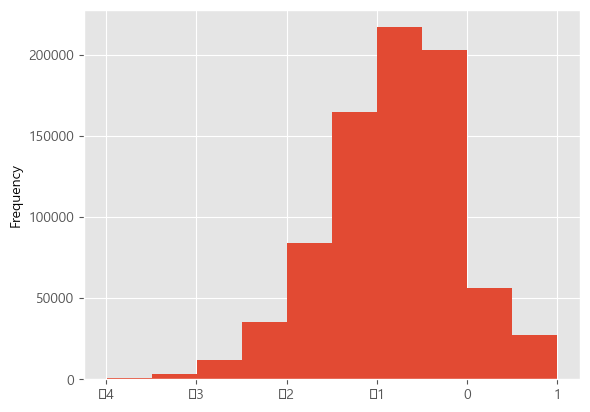

In [43]:
# # 수익률 분포
custom['RETURN'].plot.hist()

In [45]:
custom.to_csv('../data/cs_data.csv')